<a href="https://colab.research.google.com/github/marcus2188/Covid-19-Modelling/blob/master/Team_Marcus_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The 2020 coronavirus pandemic has forever changed our world in terms of how humanity handles a viral outbreak. Research and data collection has proved pivotal in the fight against this virus. In this first notebook, we investigate the distribution of the outbreak between different countries, and study the factors that concerns Covid-19 patients worldwide on a macro and micro level.

### Import libraries

In [ ]:
import matplotlib.pyplot as plt                   # Plotting Diagrams
import pandas as pd                               # Tables and dataframes
import numpy as np                                # Math functions
import seaborn as sns                             # Appealing Diagrams
import folium as fm                               # Rendering world maps
import plotly.express as px                       # Interactive diagrams
from google.colab import drive                    # For mounting files locally

### Dataset creation

In [ ]:
drive.mount('/content/drive')       # Mount at file location
# Macroscopic datasets
countries_loc = pd.read_csv('/content/drive/My Drive/lifehack2020_files/countries.csv')         # Country locations (by latitude/longitude)
daily_stats = pd.read_csv('/content/drive/My Drive/lifehack2020_files/owid-covid-data.csv')     # Country data sorted by day

# Microscopic datasets
patient_data_v5 = pd.read_csv('/content/drive/My Drive/lifehack2020_files/v5.csv')       # Original competition dataset with patient characteristics
patient_data_v6 = pd.read_csv('/content/drive/My Drive/lifehack2020_files/v6.csv')       # Preprocessed competition dataset with int/float patient features

We will be studying the attributes of confirmed coronavirus patients using the 2 original datasets provided by the Lifehack 2020. In addition, the `countries_loc` and `daily_stats` datasets provide us with further information with regards to how each country has fared in the global battle. Taken together, we will be able to analyse the scale of the outbreak both on the global and individual level. Now, let us take a look at the 4 datasets.

In [ ]:
patient_data_v5       # print first 5 and last 5 rows

age  ...  severity_illness_infectious_person
0        NaN  ...                                 NaN
1        NaN  ...                                 NaN
2        NaN  ...                                 NaN
3        NaN  ...                                 NaN
4        NaN  ...                                 NaN
...      ...  ...                                 ...
1106606  NaN  ...                                 NaN
1106607  NaN  ...                                 NaN
1106608  NaN  ...                                 NaN
1106609  NaN  ...                                 NaN
1106610  NaN  ...                                 NaN

[1106611 rows x 29 columns]

The `patient_data_v5` dataset contains a total of 1106611 rows and 29 attribute columns. Each row corresponds to a record of a confirmed coronavirus patient containing their medical and geographical information.

In [ ]:
patient_data_v6                 # print first 5 and last 5 rows

age  ...  background_diseases_hypothyroidism
0        NaN  ...                                 NaN
1        NaN  ...                                 NaN
2        NaN  ...                                 NaN
3        NaN  ...                                 NaN
4        NaN  ...                                 NaN
...      ...  ...                                 ...
1106606  NaN  ...                                 NaN
1106607  NaN  ...                                 NaN
1106608  NaN  ...                                 NaN
1106609  NaN  ...                                 NaN
1106610  NaN  ...                                 NaN

[1106611 rows x 141 columns]

Alternatively, this `patient_data_v6` dataset contains a total of 1106611 rows and 141 attribute columns. This is a preprocessed version of the Version 5 dataset that omits some of the original columns and relevant columns are encoded into integers or floating point numbers to facilitate the training of machine learning models. Also, the `symptoms` and `background_diseases` columns have been one-hot-encoded as well.

In [ ]:
daily_stats      # print first 5 and last 5 rows

iso_code continent  ... hospital_beds_per_thousand life_expectancy
0          AFG      Asia  ...                        0.5           64.83
1          AFG      Asia  ...                        0.5           64.83
2          AFG      Asia  ...                        0.5           64.83
3          AFG      Asia  ...                        0.5           64.83
4          AFG      Asia  ...                        0.5           64.83
...        ...       ...  ...                        ...             ...
31910      NaN       NaN  ...                        NaN             NaN
31911      NaN       NaN  ...                        NaN             NaN
31912      NaN       NaN  ...                        NaN             NaN
31913      NaN       NaN  ...                        NaN             NaN
31914      NaN       NaN  ...                        NaN             NaN

[31915 rows x 34 columns]

The `daily_stats` dataset (31915 rows, 34 columns) from ourworldindata.org consists of daily coronavirus confirmed cases and deaths sorted according to country. Consequently, general census data regarding the population and social status of each country is also included. This is extremely useful for our exploratory analysis later on when we study the factors that potentially affect a country's response to covid 19.

In [ ]:
countries_loc        # print first 5 and last 5 rows

country   latitude  longitude                  name
0        AD  42.546245   1.601554               Andorra
1        AE  23.424076  53.847818  United Arab Emirates
2        AF  33.939110  67.709953           Afghanistan
3        AG  17.060816 -61.796428   Antigua and Barbuda
4        AI  18.220554 -63.068615              Anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 Yemen
241      YT -12.827500  45.166244               Mayotte
242      ZA -30.559482  22.937506          South Africa
243      ZM -13.133897  27.849332                Zambia
244      ZW -19.015438  29.154857              Zimbabwe

[245 rows x 4 columns]

The forth dataset `countries_loc` (245 rows, 4 columns) provides the geographical coordinates (latitude, longitude) for each country in the world. This is essential for any map visualisations on the global scale.

### Data cleaning

In this section we will undergo the necessary data cleaning measures to ensure that the integrity of our datasets is not compromised by wrong or missing data in the tables. Invalid data points can result in inaccurate observations made and wrong conclusions drawn. More specifically, we will check the `patient_data_v6`, `countries_loc` and `daily_stats` datasets for any presence of null or unusual values. 

In [ ]:
patient_data_v5.describe()          # Mathematical statistics such as Q1, Q2, Q3, median, min and max

age  ...  confirmed_date_until_deceased_date
count  544874.000000  ...                        45119.000000
mean       43.263504  ...                            6.645449
std        17.333985  ...                            7.936479
min         0.000000  ...                          -68.000000
25%        30.000000  ...                            2.000000
50%        42.000000  ...                            5.000000
75%        55.000000  ...                           10.000000
max       120.000000  ...                           85.000000

[8 rows x 13 columns]

First we call a description on the `patient_data_v5` datasets to display the mathematical statistics of all the numeric columns. This allows us to detect any abnormalies (Eg: negative age value) present or if the values makes sense logically. From our initial inspection there are no unusual data points corresponding to any numeric column. However we note that dates are recorded in the form of the number of days that have passed since 1 Nov 2019, instead of the more familiar pd.datetime format.

In [ ]:
patient_data_v5.info()        # Print column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106611 entries, 0 to 1106610
Data columns (total 29 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   age                                       544874 non-null   float64
 1   age_band                                  550702 non-null   float64
 2   background_diseases                       138746 non-null   object 
 3   background_diseases_binary                614723 non-null   float64
 4   city                                      538198 non-null   object 
 5   confirmed_date                            1097391 non-null  object 
 6   country                                   1103696 non-null  object 
 7   date_onset_symptoms                       502076 non-null   object 
 8   deceased_date                             45303 non-null    object 
 9   infected_by                               2690 non-null     object 
 10  origin

A display of the column information in `patient_data_v5` tells us that majority of the data types are in floating point representation or as python objects. Every column contains null values except the "origin" column.

In [ ]:
countries_loc.info()         # print column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [ ]:
countries_loc.loc[countries_loc.isnull().any(axis = 1)]       # Print all rows containing null values

country  latitude  longitude                         name
156     NaN -22.95764   18.49041                      Namibia
226      UM       NaN        NaN  U.S. Minor Outlying Islands

The `countries_loc` dataset simply contains the floating point representation of the coordinates. There is 1 null data point detected in each column and as such we investigated the respective rows. A google search tells us that Namibia is a minute country in South Africa. To rectify the null value, Namibia's country code "NA" will be added but we will drop U.S. Minor Outlying Islands as its population there is extremely low (<1000).

In [ ]:
countries_loc["country"].fillna("NA", inplace = True)      # Replace null country with "NA"
countries_loc.drop(index = 226, inplace = True)            # Drop the row of index 226

In [ ]:
daily_stats.describe()         # Mathematical statistics such as Q1, Q2, Q3, median, min and max

total_cases      new_cases  ...  hospital_beds_per_thousand  life_expectancy
count  3.159200e+04   31592.000000  ...                26173.000000     31470.000000
mean   4.620240e+04     942.676374  ...                    3.151273        74.275631
std    4.676466e+05    8586.875156  ...                    2.554006         7.307569
min    0.000000e+00  -29726.000000  ...                    0.100000        53.280000
25%    1.900000e+01       0.000000  ...                    1.380000        70.600000
50%    3.810000e+02       5.000000  ...                    2.540000        75.860000
75%    4.444750e+03      93.000000  ...                    4.210000        80.100000
max    1.489052e+07  254463.000000  ...                   13.800000        86.750000

[8 rows x 29 columns]

A brief description of the `daily_stats` dataset returns some information that parallels the real life situation. As daily_stats closely mirror the global numbers, we can use Google to verify the authenticity of the dataset figures. 

At a glance all the values tally with our own research. For instance the total global cases stands at 14.89 million and deaths at 616K according to the `max()` row. This is accurate now according to Google Analytics.

In [ ]:
daily_stats.loc[daily_stats["location"] == "World"].head(2)     # Filter out 2 rows with location as World

iso_code continent  ... hospital_beds_per_thousand life_expectancy
31646  OWID_WRL       NaN  ...                      2.705           72.58
31647  OWID_WRL       NaN  ...                      2.705           72.58

[2 rows x 34 columns]

We unconventionally use `.max()` to obtain the sum of global cases instead of `.sum()` on daily cases. Upon deeper investigation, this is due to an additional row called "World" found as a country name. We must take this into account. 

In addition, the presence of negative minimum daily cases and deaths is attributed to correction adjustments issued by the country to the European Centre for Disease Prevention and Control (ECDC). The source of this dataset explains that this is caused by a country's previous overestimation of reported numbers, and hence a necessary correction to rectify earlier figures. As we are studying the daily cases in its totality, the effect of negative cases and deaths is infinitesimal to our analysis.
.

### Exploration and visualisation

Our data exploration process follows a funnel structure: 
* Global spatial distribution of the outbreak
* Macroscopic factors study by country
* Individual level social factors analysis of patients
* Microscopic study of patient's duration of illness

This way, we are fully able to comprehend how the global situation translates to smaller individuals like us. 

#### Distribution of outbreak

**First and foremost, we will attempt to visualise the spatial distribution of the outbreak among countries. This is measured both by the total number of confirmed cases and  deaths reported in each country summed up over the months. The best way to represent physical positions is through a map. That is why we picked the folium library.**

In [ ]:
countries_loc_renamed = countries_loc.rename(columns = {"name" : "location"})       # Rename the location column in countries_loc for merging
bycountry = daily_stats.groupby(["location"])["new_cases", "new_deaths"].sum()      # Count total cases and deaths grouped by country name
bycountry.reset_index(inplace= True)     # Reset to integer index instead
bycountry.rename(columns = {"new_cases" : "total_cases", "new_deaths" : "total_deaths"}, inplace = True)      # Rename columns to reflect their new definitions
coronavirus_numbers = pd.merge(bycountry, countries_loc_renamed, on = "location")                             # Merge the 2 datasets on the common column location
coronavirus_numbers["mark_color_cases"] = pd.cut(coronavirus_numbers["total_cases"], bins = 5, labels = ["green", "yellow", "orange", "red", "darkred"])     # Assign each country a different colored marker according to total cases
coronavirus_numbers["mark_color_deaths"] = pd.cut(coronavirus_numbers["total_deaths"], bins = 5, labels = ["green", "yellow", "orange", "red", "darkred"])   # Assign each country a different colored marker according to total deaths
coronavirus_numbers        # print first and last 5 rows

We join the `daily_stats` and `countries_loc_renamed` datasets to obtain a unified new dataset for map visualisation. Now with the geographical information of each country present, it is possible to represent the number of cases and deaths on a world map for comparison. The latitude and longitude values will be used as map coordinates, and the colour of the country marker suggests the severity of their domestic coronavirus outbreak. The colour spectrum parallels that of a traffic light where red is the most severe and green the least.

In [ ]:
worldcasemap = fm.Map(min_zoom = 2)                # Create new folium map object with adjusted zoom level
for point in coronavirus_numbers.iterrows():       # iterate through all rows in the dataset
    fm.CircleMarker([point[1][4], point[1][5]], popup = point[1][0]+"\n"+str(int(point[1][1])), radius = 5, color = point[1][6]).add_to(worldcasemap)
worldcasemap        # print the map object (zoomable and clickable!)

This interactive folium world map above illustrates the scale of the global outbreak. You can zoom and click onto each marker to display the total confirmed cases in that country as of data collection date. Each country is marked by a circle colored according to which numeric range of confirmed cases it falls into. This is done automatically using panda's cut function to seperate a list of values into distinct bins.

From this map, it is evident that countries that are marked with a darker shade of red is known to be suffering from the highest confirmed cases of covid 19. For example, clicking on the red circle reveals that the United States is the worst hit country worldwide with over 3.9 million cases. This is trailed closely by the orange marked Brazil at nearly 2.1 million cases. Other notable countries are Russia and India with yellow circles, as they are widely speculated to have delayed responses to the pandemic when it first hit. Majority of the other countries (green marker) have significantly lower reported cases than the aforementioned few.

In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'        # Github link containing shape data of countries
country_shapes = f'{url}/world-countries.json'            # Query the json file obtained from online
coronavirus_numbers_copy = coronavirus_numbers.copy()     # Clone the dataset for manipulation
coronavirus_numbers_copy.replace('United States', "United States of America", inplace = True)     # Synchronise country names between json and dataset
coronavirus_numbers_copy.replace('Tanzania', "United Republic of Tanzania", inplace = True)
coronavirus_numbers_copy.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
coronavirus_numbers_copy.replace('Congo', "Republic of the Congo", inplace = True)
coronavirus_numbers_copy.replace('Lao', "Laos", inplace = True)
coronavirus_numbers_copy.replace('Syrian Arab Republic', "Syria", inplace = True)
coronavirus_numbers_copy.replace('Serbia', "Republic of Serbia", inplace = True)
coronavirus_numbers_copy.replace('Czechia', "Czech Republic", inplace = True)
coronavirus_numbers_copy.replace('UAE', "United Arab Emirates", inplace = True)

In [ ]:
deathmap = fm.Map(min_zoom = 2)     # Create new folium map object with adjusted zoom level
fm.Choropleth(geo_data = country_shapes, name = "Coronavirus Deaths Map", data = coronavirus_numbers_copy[["location", "total_deaths"]], columns = ["location", "total_deaths"], key_on = "feature.properties.name", fill_color = "Oranges", nan_fill_color = "white").add_to(deathmap)
deathmap                            # print the choropleth map (zoomable and clickable!)

Choropleth maps use differences in shade, colour, or position of symbols within predefined shapes to indicate numeric variables of a particular quantity in that section. This gives us an aesthetically pleasing look at geographical distributions, whereas the former map displays discrete markers denoting only the confirmed cases.

The above choropleth map shows the distribution of covid 19 deaths in the world via different shades of orange colour. Evidently, the United States has the deepest orange-brown intensity (most number of deaths). Other countries follow the expected trend as observed from the total confirmed cases, namely Brazil and India. 

We observe that certain countries such as Mexico and Italy report significantly higher amount of deaths relative to their confirmed cases. This can be attributed to widely reported news that Mexico's and Italy's healthcare system was unable to cope with the sudden explosive demand of new patients, especially since they have a larger population of elderly citizens. 

In [ ]:
SEAlist = ["Brunei", "Myanmar", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam"]      # List of south east asian countries
coronavirus_numbers_sea = coronavirus_numbers_copy[coronavirus_numbers_copy["location"].isin(SEAlist)]       # filter out south east asian countries from dataset
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'     # Github link containing shape data of countries
country_shapes = f'{url}/world-countries.json'                           # Query the json file obtained from online
seacasemap = fm.Map(location = (3.3274, 117.5785), zoom_start = 4)       # Create new folium map object with adjusted starting coordinates and zoom level
fm.Choropleth(geo_data = country_shapes, name = "Coronavirus Map", data = coronavirus_numbers_sea[["location", "total_cases"]], columns = ["location", "total_cases"], key_on = "feature.properties.name", fill_color = "BuPu", nan_fill_color = "white").add_to(seacasemap)
seacasemap          # print the map object

Closer to our home, we study the 10 south east asian countries and their numbers. This is achieved using a filter on the dataset and a customised starting coordinate for the map. This narrowed list of countries allows us to make more suitable comparisons between Singapore and her neighbours. As such with a largely similiar culture and geographical climate, we can derive the relative effectiveness of the policies each country implemented to counter the pandemic.

From observation, Indonesia is the worst hit country with large distinct purplish regions in Sumatra and Semarang (Total 88K+ cases). Philippines (Indigo shade) is a close second followed by the other ASEAN nations. On first glance, Thailand, Malaysia and Singapore are affected by the outbreak relatively less as seen by the grey shade. 

Something to note is that the choropleth shape of Singapore is not present in the API we obtained from Github. As such, the shape of Singapore is not visible in the map above. From our own research, there are 48K confirmed cases as of writing hence a complete map will show Singapore shaded indigo in colour.


For a more numerically direct comparison between countries, we plot a stacked bar chart detailing the top 10 countries worst hit by the pandemic in terms of confirmed cases.

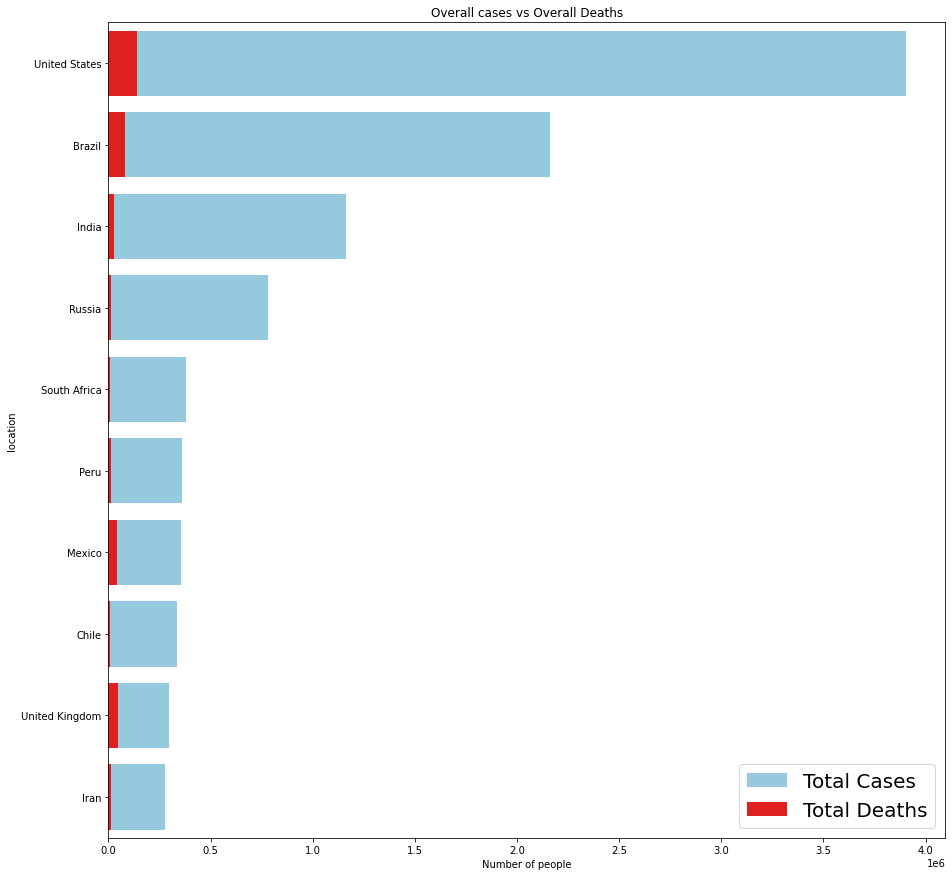

In [ ]:
cases_top10 = (coronavirus_numbers.sort_values(by = "total_cases", ascending = False))[:10]     # Sort countries by highest total cases
plt.figure(figsize = (15,15))      # Initialise figure
g1 = sns.barplot(x = "total_cases", y = "location", data = cases_top10, color = "skyblue", label = "Total Cases")     # Total cases by country
g2 = sns.barplot(x = "total_deaths", y = "location", data = cases_top10, color = "red", label = "Total Deaths")       # Total deaths by country
plt.title("Overall cases vs Overall Deaths")     # Add figure title
plt.xlabel("Number of people")                   # Add x axis label
plt.legend(fontsize = 20)                        # Add figure legend
plt.show()                                       # Show the figure

This stacked barplot details the important contrasts between the number of cases and deaths. The different colour shows us the ratio of fatality as a result of their domestic pandemics. This is crucial as it encourages us to explore factors later that explain why certain countries have a higher death rate than others. 

The above demonstrates known news that the United States, Brazil, India and Russia lead the coronavirus numbers, in that order. The total number of deaths is understably lower compared to confirmed cases. This is not unexpected, given reports that COVID-19 is hardly fatal compared to SARS in 2002, but easy to transmit. A large proportion of covid 19 patients can and have recovered from the illness.

**Taken in totality, our distribution analysis will prove useful for global health governing bodies such as the World Health Organisation (WHO) to determine the most efficient allocation of resources to different countries.**

For instance in the initial phases of the pandemic, badly hit countries such as Wuhan(China) and Italy have seen increased international mask shipments imported domestically to aid in the relief efforts. In the same vein, certain countries may lack the financial ability and healthcare infrastructure to handle the virus (South America and Africa). As such, WHO should use this data to advise and help divert more resources to countries in need the most.

#### Macro factors analysis

**Having accessed the physical distribution of the worldwide pandemic, it is necessary for us to examine the various factors that potentially influences the domestic battle in each country. We will conduct multiple investigations into the relationship between the different population metric columns in order to study why the cases and death numbers are as what we see today.**

We will utilise both our custom created dataframe `coronavirus_numbers` from the previous section, and the raw `daily_stats` dataset for this analysis.

It is widely predicted that richer countries that have a higher life expectancy due to higher standard of living may tend to be less impacted by the covid 19 outbreak. Logically, wealthy countries should have more than adequate medical resources like hospital beds and ventilators to support the sick and flatten the curve. To investigate this notion, we must extract the `gdp_per_capita` and `life_expectancy` columns grouped by each country.

In [ ]:
bycountrywealth = (daily_stats.groupby(["location"])[["gdp_per_capita", "life_expectancy"]].max()).reset_index()    # Groupby country names to get GDP and life expectancy
bycountrywealth     # Print the table

location  gdp_per_capita  life_expectancy
0       Afghanistan        1803.987            64.83
1           Albania       11803.431            78.57
2           Algeria       13913.839            76.88
3           Andorra             NaN            83.73
4            Angola        5819.495            61.15
..              ...             ...              ...
207  Western Sahara             NaN            70.26
208           World       15469.207            72.58
209           Yemen        1479.147            66.12
210          Zambia        3689.251            63.89
211        Zimbabwe        1899.775            61.49

[212 rows x 3 columns]

The resulting table successfully captures the monetary data of each country as well as their life expectancy. But several less populated countries namely Andorra and Western Sahara show null figures for their Gross Domestic Product. We understand that in remote places like these, measurement of national data may be hampered by geographical difficulties and underdeveloped amenities. We cannot trace the cause of these null values.

In [ ]:
bycountrywealth.dropna(inplace = True)   # Drop rows with null values altogether

As such, we decided to drop rows with null GDP values or life expectancies.

In [ ]:
bycountry1 = (pd.merge(coronavirus_numbers, bycountrywealth, on = "location")).reset_index()
fig = px.scatter(bycountry1, x = "total_deaths", y = "total_cases", size = "gdp_per_capita", color = "life_expectancy", hover_name = "location", size_max = 60)
fig.show()

The relationship between a country's material wealth and the scale of their outbreak is best illustrated with a bubble blot. It is essentially a 2D scatter plot of two numeric columns with an added bonus of bubble sizes. Countries that appear at the top right are considered to be worst hit by covid 19, vice versa for the bottom left. GDP figures influence size of bubble.

Studying this plotly chart, we see that the United States appears at the far corner in the top right despite being marked with a large sized bubble (high GDP_pc). Brazil has a smaller GDP_pc albeit lesser cases and deaths. On the other hand, there exist countries with huge GDP_pc figures (Qatar) that have relatively low total cases and deaths. All these tell us that GDP_pc is not a good indicator of how well a country fares in the coronavirus fight. Rather, numerous other factors may be more important to determine efficiency of a country's effort.

Life expectancy as evident in the different colour shades, has no clear relationship with how well each country copes with the pandemic. Countries coloured with yellow bubbles appear in many different sectors of the pandemic matrix bubble plot.

**Besides economic variables, the scale of a country's outbreak may be dependent on other more crucial factors that directly influence the healthcare crisis. For instance, the number of hospital beds and handwashing facilities are obvious determinants of how well the country is prepared to handle such an outbreak.**

The column `handwashing_facilities` denotes the percentage of the country's population with access to clean water for sanitation purposes. This is important because access to sanitation facilities would help to ameliorate the spread of COVID-19. `hospital_beds_per_thousand` displays the number of hospital beds per 1,000 citizens in the country's population. This variable directly tells us how strong the healthcare infrastructure of a country is. 

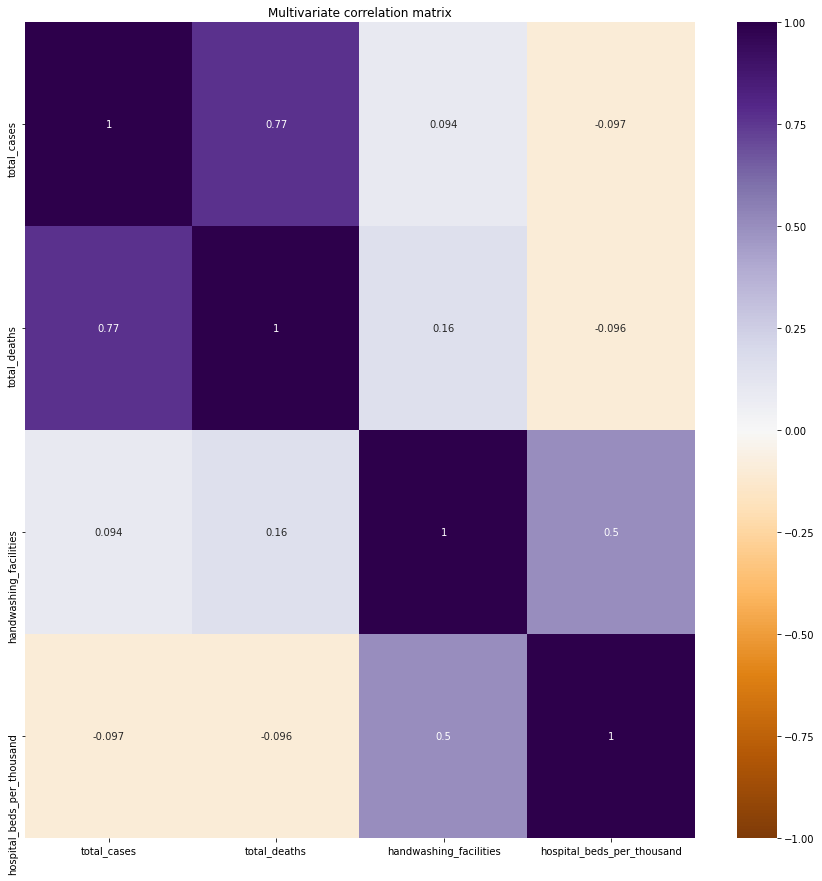

In [ ]:
bycountryhealth = (daily_stats.groupby("location")[['handwashing_facilities', 'hospital_beds_per_thousand']].max()).reset_index()    # Group By healthcare and sanitation facilities
bycountryhealth.dropna(inplace=True)                                   # Drops rows containing null values
bycountry2 = pd.merge(bycountry1, bycountryhealth, on = "location")    # Merge the datasets together
plt.figure(figsize = (15, 15))                   # Adjust heatmap size
sns.heatmap(bycountry2[["total_cases", "total_deaths", "handwashing_facilities", "hospital_beds_per_thousand"]].corr(), annot=True, cmap = "PuOr", vmin=-1, vmax=1)   # Heatmap with correlation matrix
plt.title("Multivariate correlation matrix")     # Add title
plt.show()                                       # Shows the heatmap 

The multivariate correlation matrix allows us to understand the relationship between all four attributes. The diagonals have a correlation coefficient of 1 as the two variables compared are identical. Deeper colour shades represent stronger correlation and vice versa for lighter shades. 

A strong positive relationship is observed between `total_cases` and `total_deaths` (+0.77). This is expected because with a larger proportion of confirmed cases, there is bound to be a greater number of deaths. For example, the US has the most number of confirmed cases and deaths simultaneously. Between `handwashing_facilities` and `hospital_beds_per_thousand`, we can see that they are moderately proportional (+0.5) as shaded by the light purple colour. Realistically, this makes sense as more sanitation facilities are required to run hospitals. 

Predictably, more hospital beds will result in lesser number of cases and deaths (-0.097, -0.096). These negative correlation coefficients mean that if a country has greater access to healthcare and sanitation facilities, there is a high probability of reducing their total number of confirmed cases and deaths. 


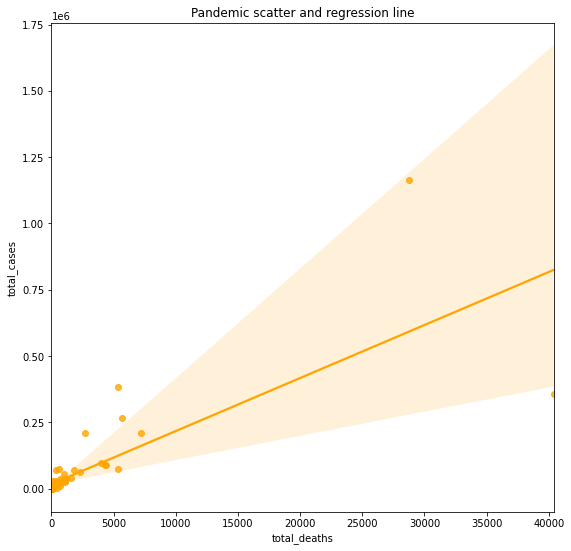

In [ ]:
plt.figure(figsize = (9, 9))                         # Adjust figure size
sns.regplot(x = "total_deaths", y = "total_cases", data = bycountry2, color="orange")   # Plots scatterplot + regression line
plt.title("Pandemic scatter and regression line")    # Sets plot title
plt.show()                                           # Shows plot 

Scatterplots do the best job in visualising strong relationships between two numeric variables. Here, we included an estimated linear regression line generated by seaborn's regplot. This regression line tells us how strong the relationship is between `total_cases` and `total_deaths`. 

The regression line aims to reduce the total sum of squares, which we would explore further in our Machine Learning Notebook when we look at logistic regression.

**Thus far, we now have a clearer picture of the macroscopic scale of the outbreak among the countries of the world. We also touched upon the numerous national factors that may influence how well a country handles the pandemic.** 

That said, a country is not without its citizens. It is crucial to analyse coronavirus patients to understand the factors that affect the sick at an individual level. This is because we can gain valuable insights about how certain human attributes affect the severity of their illness. Knowing this aids healthcare officials who seek to flatten the curve. Subsequently, these attributes will be explored when we move onto our Machine Learning models.

#### Social factors patient analysis

**We have taken a look at how the different countries fare in the international fight against covid 19. Now we shall dive deeper into the analysis of coronavirus patients and their attributes. We will more specifically look at the `patient_data_v6` datasets in detail.**

In this section, we aim to group the columns representing various social aspects and human characteristics together. Doing so simplifies the analysis further.

In [ ]:
patient_data_v6   # Print first and last 5 rows

age  ...  background_diseases_hypothyroidism
0        NaN  ...                                 NaN
1        NaN  ...                                 NaN
2        NaN  ...                                 NaN
3        NaN  ...                                 NaN
4        NaN  ...                                 NaN
...      ...  ...                                 ...
1106606  NaN  ...                                 NaN
1106607  NaN  ...                                 NaN
1106608  NaN  ...                                 NaN
1106609  NaN  ...                                 NaN
1106610  NaN  ...                                 NaN

[1106611 rows x 141 columns]

Let us understand the columns further before we proceed. The `patient_data_v6` dataset contains columns representing social factors of each patient:

* `age`: the patient's age
* `age_band`: the patient's age band
* `background_diseases_binary`: whether the patient has any background diseases beforehand (1 if Yes, 0 if No)
* `country`: country where person is from, labelled as a number (e.g. United States as 6)
* `severity_illness`: The severity of a patient's illness [Cured = 0, Good = 1, Critical = 2, Deceased = 3, Asymptomatic = 4]
* `sex`: the patient's gender
* `smoking`: whether the patient is a smoker (1 if Yes, 0 if No)
* `treatment`: The current treatment the patient is undergoing [Home Isolation = 0, Clinic = 1, Hospital = 2]

The date columns are measured by the number of days between two dates (e.g. between 1st November 2019 and date of recording). 

The patients' symptoms and background diseases are one-hot encoded. 

In [ ]:
patient_data_v6.describe()   # Mathematical data of numeric columns only

age  ...  background_diseases_hypothyroidism
count  544874.000000  ...                       138746.000000
mean       43.263504  ...                            0.000014
std        17.333985  ...                            0.003797
min         0.000000  ...                            0.000000
25%        30.000000  ...                            0.000000
50%        42.000000  ...                            0.000000
75%        55.000000  ...                            0.000000
max       120.000000  ...                            1.000000

[8 rows x 139 columns]

The description table above displays all the statistics of the numeric columns. Through this, we can gather meaningful information about the data collected as well as their distributions. At first glance we do not detect any abnormal values. Understanding the dataset is crucial for sound data analytics. In the next few sections, the distributions of several important attributes will be explored using both tables, diagrams and matrices.

<Figure size 864x864 with 0 Axes>

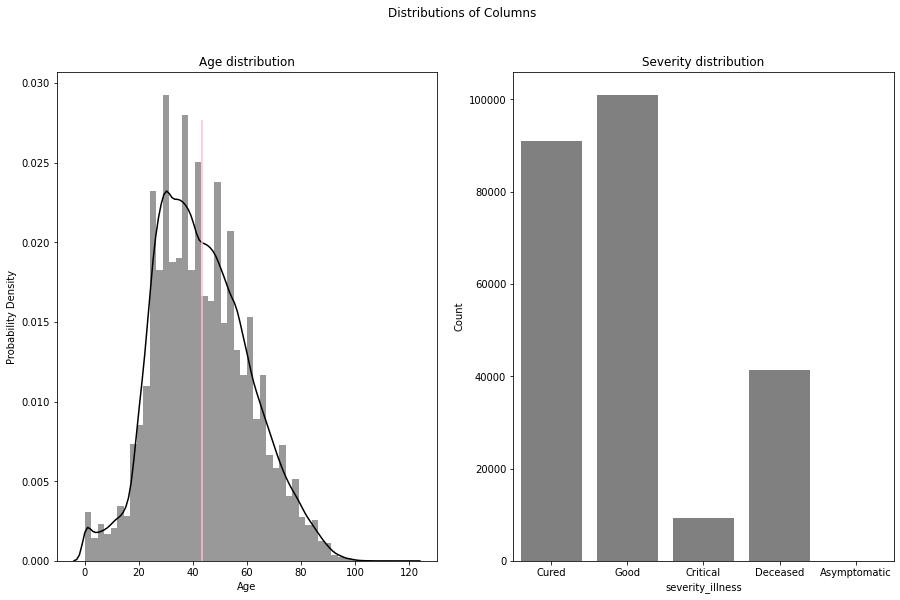

In [ ]:
age_notnull = patient_data_v6[patient_data_v6['age'].notnull()]['age']        # Obtain series of non null ages
age_notnull.reset_index()                                                     # Reset to integer index
severity_notnull = (patient_data_v6[patient_data_v6["severity_illness"].notnull()]["severity_illness"]).reset_index()     # process the severity table
plt.figure(figsize = (12, 12))                                                # Initialise figure and set figure size
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,9))              # Initialise subplots
fig.suptitle("Distributions of Columns")                                      # Overall title
g1 = sns.distplot(age_notnull, color = 'black', ax = axes[0])                 # Plot histogram of counts on list of ages
axes[0].axvline(43.263504, 0, 0.9, color = 'pink')                            # Plot vertical mean line
g2 = sns.countplot(data = severity_notnull, x = "severity_illness", color = 'grey', ax = axes[1])     # Plot countplot for severity
g1.set(xlabel = "Age", ylabel = "Probability Density", title = "Age distribution")                    # Set figure attributes
g2.set(ylabel = "Count", title = "Severity distribution", xticklabels = ["Cured", "Good", "Critical", "Deceased", "Asymptomatic"])     # Set figure attributes 
plt.show()            # show the figure

Histograms are specialised bar charts which displays the frequency of occurrences of a numeric variable like `Age`, in contrast to the countplot on the right. The kernel density estimation (KDE) curve is a popular method of estimating the probability density function of a random variable. Through these we can study the distributions of the age and severity columns and make useful inferences. 

By observation, the patients' age largely resembles a normal distribution (albeit slightly skewed towards the left). The pink vertical line represents the mean age (43.3 years). A good guide to remember is that about 95% of all the age values are enclosed between the mean and two standard deviations (in both directions away from the mean). This means that with a mean of 43.3 years and a sd of 17.3 years, there is a 95% probability that a COVID-19 patient's age would be between 8.7 years old and 77.9 years old. 

Moving to the bar countplot, there is noticably little asymptomatic data points compared to recovered or deceased patients. The "good" `severity_illness` rating referring to stable coronavirus patients that show mild symptoms is the mode. In conclusion this dataset is predominantly filled with either stable, deceased or recovered patients.

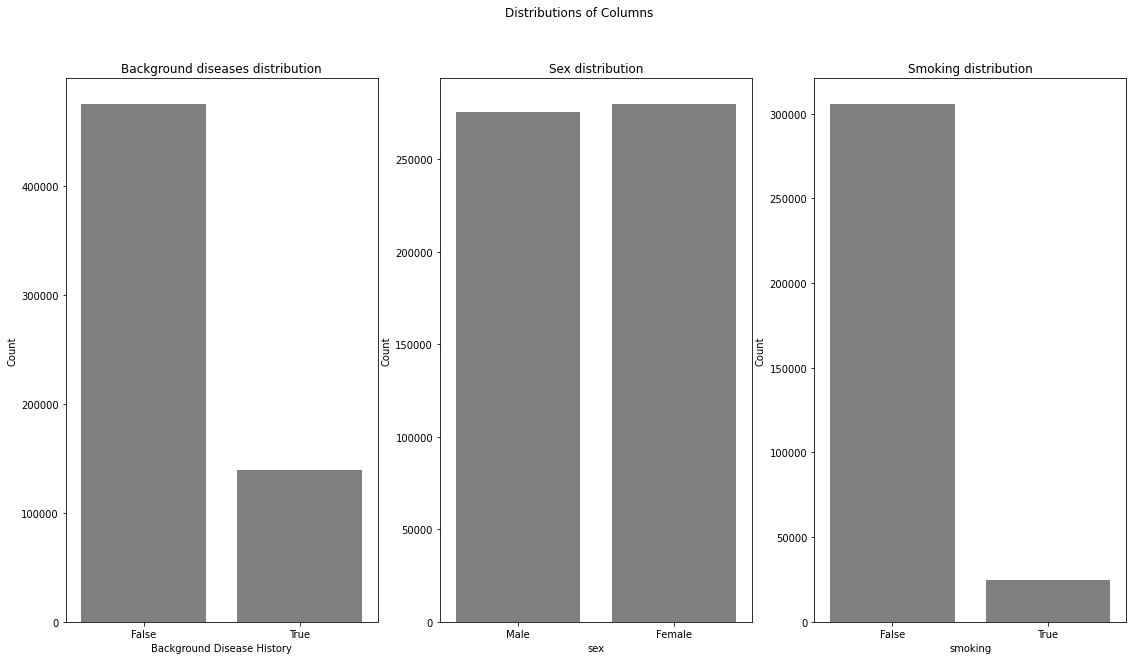

In [ ]:
bgd_notnull = (patient_data_v6[patient_data_v6["background_diseases_binary"].notnull()]["background_diseases_binary"]).reset_index()   # drop all null values and reset index
sex_notnull = (patient_data_v6[patient_data_v6["sex"].notnull()]["sex"]).reset_index()                                                 # drop all null values and reset index
smoke_notnull = (patient_data_v6[patient_data_v6["smoking"].notnull()]["smoking"]).reset_index()                                       # drop all null values and reset index          
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (19,10))              # Initialise subplots
fig.suptitle("Distributions of Columns")                                      # Overall title
r1 = sns.countplot(data = bgd_notnull, x = "background_diseases_binary", color = 'grey', ax = axes[0])      # Plot countplot for background_diseases
r2 = sns.countplot(data = sex_notnull, x = "sex", color = 'grey', ax = axes[1])                             # Plot countplot for sex
r3 = sns.countplot(data = smoke_notnull, x = "smoking", color = 'grey', ax = axes[2])                       # Plot countplot for smoking
r1.set(xlabel = "Background Disease History", ylabel = "Count", title = "Background diseases distribution", xticklabels = ["False", "True"])       # Set figure attributes
r2.set(ylabel = "Count", title = "Sex distribution", xticklabels = ["Male", "Female"])           # Set figure attributes 
r3.set(ylabel = "Count", title = "Smoking distribution", xticklabels = ["False", "True"])        # Set figure attributes 
plt.show()            # show the figure

We plot the bar chart distributions of 3 other important columns representing social factors. From this diagram we can derive a better understanding of the dataset.

It can be clearly seen that there is no discrimination of gender in the data collection process, with relatively equal proportion of male and female patients. Consequently, only a small subset of covid 19 suffer additional background diseases like Colon Cancer. Additionally, majority of our patients do not smoke.

**Having understood the distribution of the respective columns, we turn our attention to explore the relationships shared between these attributes. A good data exploration involves understanding the correlation between the different columns, to draw conclusions from them.**

Allow us to start with several binary correlation studies. Reports speculate that older populations with a higher age tend to exhibit a [higher probability of succumbing to the coronavirus infection](http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-41e9-9a9b-fea8db1a8f51). Countries like Italy faced an initial explosion of cases widely credited to their [larger percentage of older citizens](https://www.prb.org/countries-with-the-oldest-populations/). As such we shall investigate these multiple social factors and visualise their relationship with regards to the severity of the illness. 

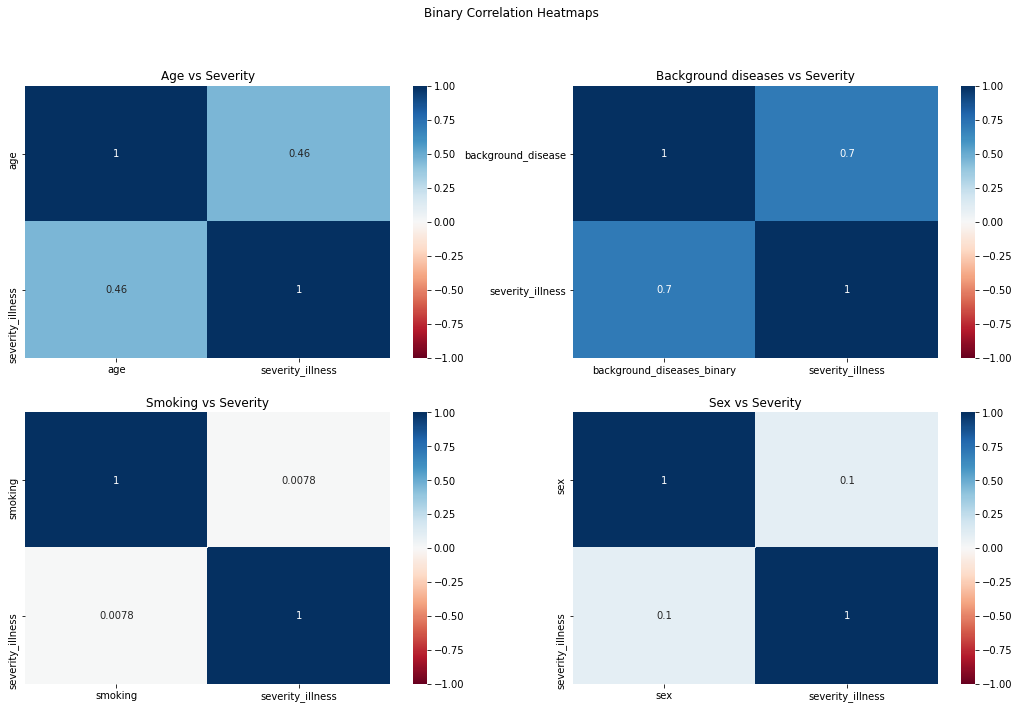

In [ ]:
social_factors = patient_data_v6[["age", "age_band", "severity_illness", "sex", "smoking", "background_diseases_binary", "country"]]    # Extract social factor columns
mask_age_severity = social_factors["age"].notnull() & social_factors["severity_illness"].notnull()      # Masks to filter out non null rows
age_severity_notnull = (social_factors.loc[mask_age_severity])[["age", "severity_illness"]]             # Filter out non null rows
mask_bgd_severity = social_factors["background_diseases_binary"].notnull() & social_factors["severity_illness"].notnull()      
bgd_severity_notnull = (social_factors.loc[mask_bgd_severity])[["background_diseases_binary", "severity_illness"]]             
mask_smoke_severity = social_factors["smoking"].notnull() & social_factors["severity_illness"].notnull()      
smoke_severity_notnull = (social_factors.loc[mask_smoke_severity])[["smoking", "severity_illness"]]   
mask_sex_severity = social_factors["sex"].notnull() & social_factors["severity_illness"].notnull()      
sex_severity_notnull = (social_factors.loc[mask_sex_severity])[["sex", "severity_illness"]]        

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18,11))     # Plot subplots
fig.suptitle("Binary Correlation Heatmaps")                           # Add figure title
w1 = sns.heatmap(age_severity_notnull.corr(), annot = True, cbar = True, cmap = "RdBu", vmin = -1, vmax = 1, ax = axes[0][0])   # Plot heatmaps
w2 = sns.heatmap(bgd_severity_notnull.corr(), annot = True, cbar = True, cmap = "RdBu", vmin = -1, vmax = 1, ax = axes[0][1])
w3 = sns.heatmap(smoke_severity_notnull.corr(), annot = True, cbar = True, cmap = "RdBu", vmin = -1, vmax = 1, ax = axes[1][0])
w4 = sns.heatmap(sex_severity_notnull.corr(), annot = True, cbar = True, cmap = "RdBu", vmin = -1, vmax = 1, ax = axes[1][1])
w1.set(title = "Age vs Severity")         # Set subplot title
w2.set(yticklabels = ["background_disease", "severity_illness"], title = "Background diseases vs Severity")       # Set title and yticklabels
w3.set(title = "Smoking vs Severity")     # Set subplot title
w4.set(title = "Sex vs Severity")         # Set subplot title
plt.show()                                # Print the figure

Correlation heatmaps from seaborn provide us with a colored representation of the correlation coefficient between 2 columns. It is commonly used to describe how close the two attributes are related to each other. The spectrum ranges from 1 (Directly related) to -1 (Inversely related). 0 represents no visible correlation.

`background_diseases_binary` indicates the strongest positive relationship (+0.7) with the severity of coronavirus illness, compared to `age` (+0.46). This proves that patients with underlying health conditions are more susceptible to the virus. Consequently from the heatmap a patient's age is only moderately related to their illness severity. This is not adequate to suggest that older individuals are more likely to die from covid 19. 

Both `sex` and `smoking` is relatively unrelated to the severity as outlined by the low coefficients (+0.0078 and +0.1). It is unlikely that these 2 social factors will affect how severe their condition is. 

In studying the severity of the COVID-19 pandemic, we have to analyse the patient composition of the various severity types (Deceased, Recovered) in order to gather further insights into the fatality numbers. We will expand on the categories found in the `severity_illness` attribute.

In [ ]:
fig = px.box(age_severity_notnull, x="severity_illness", y="age", points= False, color = "severity_illness", title = "Severity Types by age")     # Create plotly boxplot
fig.update_layout(showlegend=False)      # Remove the legend
fig.show()                               # Show figure

Interactive Boxplots are amazing at graphing categorical columns against numeric variables to show the inner distributions. This box and whiskers diagram gives us a glimpse of the age group composition of each severity. Note that the integers 0 to 3 represent increasing severity of illness but value 4 denotes an asymptomatic case.

When you hover over each boxplot, you can observe that Quartile 1, median age (Q2) and the 75th percentile all increase with the severity. Of the patients that died from covid 19 (purple), their median age totals to 63 years old. The range (Min-Max) of ages is the greatest amongst stable patients (blue).

This boxplot lends strength to the notion that younger people might stand a higher chance of recovery (red plot) and vice versa for deaths.

**Besides the social attributes, we will also consider the time duration that a patient has suffered from Covid 19 in the next section. The date columns may provide useful information with regards to how well each patient is coping with the virus.**

#### Patient illness duration analysis

**We have learnt that a multitude of social attributes namely age and background diseases can potentially influence the severity of illness. However the story does not end there. The datasets contains other attributes such as relevant dates and date differences (days) of each patient. Studying these columns in detail is equally paramount as we solidify our patient analysis.**

We will first narrow our focus on the nationality of the patients and how it relates to the length of time they either undergone treatment or passed away. This is because we can have derive a better understanding of the quality of healthcare services in each country. Measuring the rate of recovery or rate of death is a good indicator of a country's healthcare infrastructure.

In [ ]:
country_dates = patient_data_v6[["confirmed_date_until_released_date", "confirmed_date_until_deceased_date", "country"]]   # Filter dates and countries
country_dates.describe()    # Print mathematical stats of numeric columns

confirmed_date_until_released_date  ...       country
count                        86480.000000  ...  1.103696e+06
mean                            18.729394  ...  2.285070e+01
std                              8.318238  ...  1.523504e+01
min                            -25.000000  ...  0.000000e+00
25%                             12.000000  ...  1.100000e+01
50%                             19.000000  ...  2.500000e+01
75%                             24.000000  ...  2.500000e+01
max                            114.000000  ...  1.370000e+02

[8 rows x 3 columns]

A simple description called on the relevant columns reveals several odd details. The minimum number of days of recovery and death is negative (-25.0 and -68.0). To ensure we are working with a clean dataset an investigation is necessary here.

In [ ]:
date_difference = pd.to_datetime(patient_data_v5["released_date"]) - pd.to_datetime(patient_data_v5["confirmed_date"])    # Obtain date difference between release and confirmation
negative_dates = [x for x in date_difference if x.days < 0]          # Make list of negative date differences
print(len(negative_dates), "negative date differences present")      # Count number of negative values

68 negative date differences present


68 negative date differences from confirmation to release is detected. Negative date difference is perculiar because conventionally no patient is allowed to be released from the hospital before confirmation (positive test). Note that the definition of confirmation in this dataset is a patient having obtained a positive test result. Releasing a positively tested covid 19 patient will be damaging due to the spread of the virus to more people. 

Similarly for the difference between the confirmed date and deceased date, although it is possible that a patient tests positive only after their death, such a situation is logically unlikely to take over 60 days (min value) post-death. An autopsy to detect the cause of death will most probably take place immediately. 

As such, we have decided to label negative date differences as a data recording error and will eliminate these entries for our analysis.

In [ ]:
patients_died_after_release = country_dates[country_dates.confirmed_date_until_released_date.notnull() & country_dates.confirmed_date_until_deceased_date.notnull()]     # Filter out non null columns
patients_died_after_release      # Print the patient rows

confirmed_date_until_released_date  ...  country
7275                                  28.0  ...      4.0
7401                                  64.0  ...      4.0
105343                                14.0  ...     24.0
108833                                 4.0  ...     24.0
109540                                11.0  ...     24.0
110069                                 4.0  ...     24.0
111292                                19.0  ...     24.0
111881                                27.0  ...     24.0
117622                                 8.0  ...     24.0
119037                                18.0  ...     24.0
123041                                36.0  ...     24.0
125642                                10.0  ...     24.0
134161                                26.0  ...     24.0
141444                                21.0  ...     24.0
149202                                11.0  ...     24.0
152639                                12.0  ...     24.0
158786                                15.0  ...     24.0
166826                                 7.0  ...     24.0
197009                                14.0  ...     24.0

[19 rows x 3 columns]

We tried to examine the non null columns of the relevant dates corresponding to each patient. An unexpected observation is that there exist 19 patients who died from the virus after their release date. This is likely attributed to patients deaths recorded outside the hospital (their homes). In the real world, cases like this are few and far between because generally hospitals will not release critical patients who have a high chance of death. Nevertheless, we note this detail.

Conincidentally upon further inspection of the country labels and their floating point representation from the [Google Sheets](https://docs.google.com/spreadsheets/d/1awEY-04UK8wibkbZ1qfV6a-Q9YKScfP7qiAtWDsp9Jw/edit#gid=0), a glaring mistake we detected is that the `country` South Korea has 3 different numbers assigned to it. 
* 4.0 : Korea
* 21.0 : South Korea
* 28.0 : South Korea

If left unaltered, this repetition will cause our diagrams and analysis to be incorrect. So, we will standardise all `patients.country` from South Korea to the value 4.0 using a universal replace function.

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



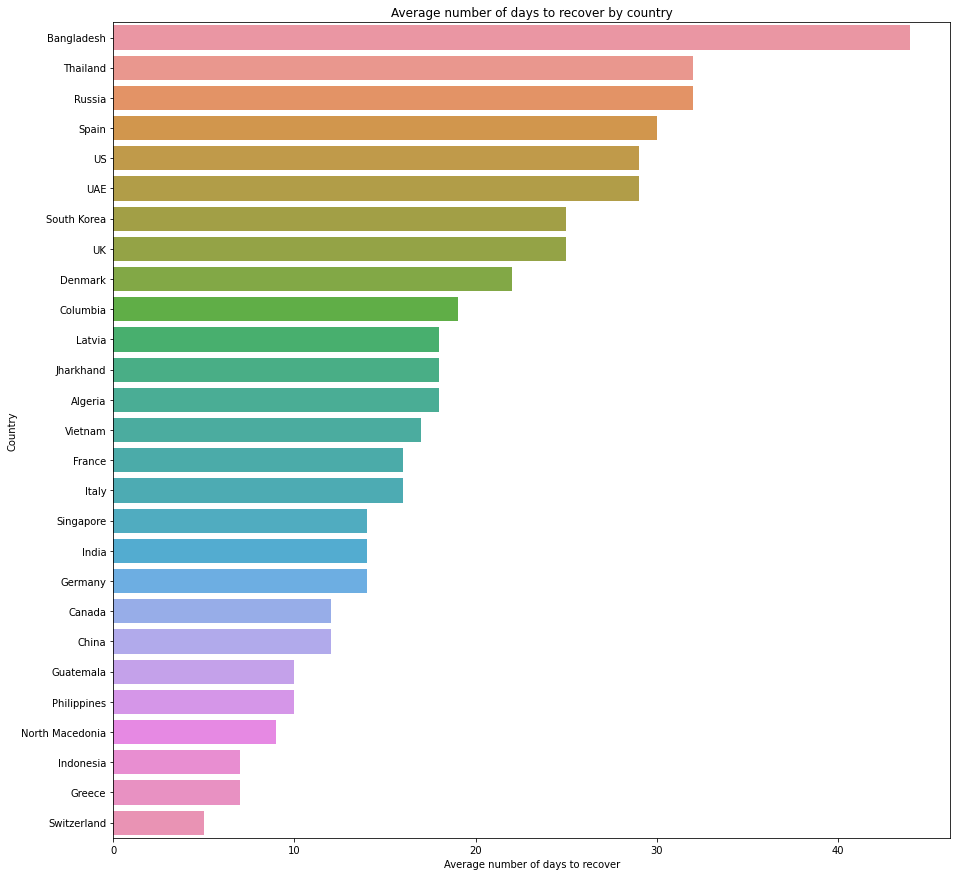

In [ ]:
country_dates_nonnull = country_dates[country_dates.country.notnull() & country_dates.confirmed_date_until_released_date.notnull()]   # Filter all non null columns
country_dates_nonnull1 = country_dates_nonnull[country_dates_nonnull["confirmed_date_until_released_date"] >= 0]                      # Filter all positive columns
country_dates_nonnull1["country"].replace(21.0, 4.0, inplace = True)      # Replace all South Korea values
country_dates_nonnull1["country"].replace(28.0, 4.0, inplace = True)      # Replace all South Korea values
country_dates_bycountry = country_dates_nonnull1.groupby(["country"])["confirmed_date_until_released_date"].mean()     # Groupby country to get average recovery days
country_dates_reseted = country_dates_bycountry.reset_index()             # Reset index to integers
country_dates_reseted["country"] = (country_dates_reseted["country"].astype("int")).astype("category")                 # Convert country values to a categorical representation for chart
country_dates_reseted.sort_values(by = "confirmed_date_until_released_date", ascending = False, inplace = True)
final = country_dates_reseted.reset_index()     # Reset Index again
plt.figure(figsize = (15,15))                   # Initialise figure and size
h1 = sns.barplot(x = "confirmed_date_until_released_date", y = "country", data = final.round(0), order = final["country"])     # Plot bar chart
h1.set(yticklabels = ["Bangladesh", "Thailand", "Russia", "Spain", "US", "UAE", "South Korea", "UK", "Denmark", "Columbia", "Latvia", "Jharkhand", "Algeria", "Vietnam", "France", "Italy", "Singapore", "India", "Germany", "Canada", "China", "Guatemala", "Philippines", "North Macedonia", "Indonesia", "Greece", "Switzerland"])   # Change the attributes
plt.xlabel("Average number of days to recover")               # Change x axis label
plt.ylabel("Country")                                         # Change y axis label
plt.title("Average number of days to recover by country")     # Change title of figure
plt.show()                                                    # Print the figure

The bar chart above compares the average number of days for recovery among different countries. This direct numerical comparison allows for accurate conclusions drawn about the efficacy of their healthcare systems to help patients recover from coronavirus. In essence, the faster the recovery, we infer the higher the quality of healthcare rendered to patients. Note that only countries with non null values are evaluated.

It is clear that Bangladesh patients take the longest to recover (over 40 days), followed with Thailand and Russia. This is in tandem with news about India's relatively [weaker healthcare infrastructure](https://www.who.int/workforcealliance/countries/bgd/en/) especially in rural settlements to fight the pandemic. In contrast Switzerland, a scandinavian country reputed to have the world's [most esteemed healthcare system](https://www.forbes.com/sites/theapothecary/2011/04/29/why-switzerland-has-the-worlds-best-health-care-system/#6b7cc8507d74), fares the best out of the above countries ( under 10 days). 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



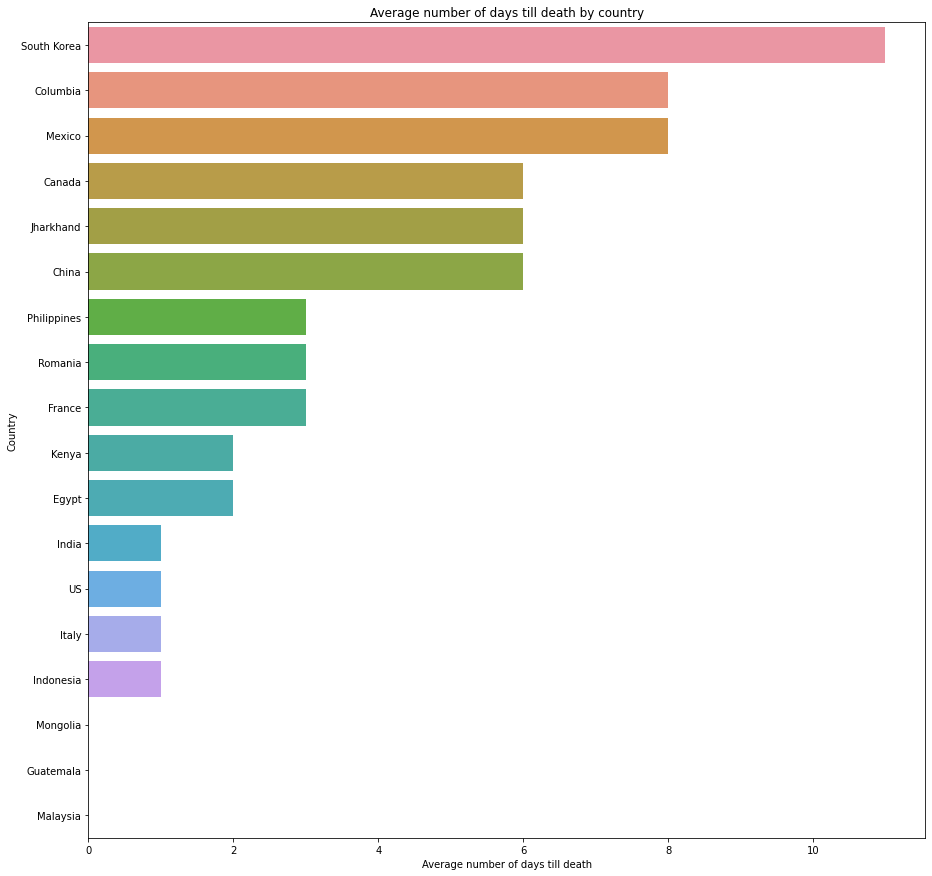

In [ ]:
death_nonnull = country_dates[country_dates.country.notnull() & country_dates.confirmed_date_until_deceased_date.notnull()]           # Filter all non null columns
death_nonnull1 = death_nonnull[death_nonnull["confirmed_date_until_deceased_date"] >= 0]                                              # Filter all positive columns
death_nonnull1["country"].replace(21.0, 4.0, inplace = True)      # Replace all South Korea values
death_nonnull1["country"].replace(28.0, 4.0, inplace = True)      # Replace all South Korea values
death_bycountry = death_nonnull1.groupby(["country"])["confirmed_date_until_deceased_date"].mean()                      # Groupby country to get average recovery days
death_bycountry_reseted = death_bycountry.reset_index()           # Reset index to integers
death_bycountry_reseted["country"] = (death_bycountry_reseted["country"].astype("int")).astype("category")              # Convert country values to a categorical representation for chart
death_bycountry_reseted.sort_values(by = "confirmed_date_until_deceased_date", ascending = False, inplace = True)
final1 = death_bycountry_reseted.reset_index()     # Reset Index again
plt.figure(figsize = (15,15))                     # Initialise figure and size
p1 = sns.barplot(x = "confirmed_date_until_deceased_date", y = "country", data = final1.round(0), order = final1["country"])     # Plot bar chart
p1.set(yticklabels = ["South Korea", "Columbia", "Mexico", "Canada", "Jharkhand", "China", "Philippines", "Romania", "France", "Kenya", "Egypt", "India", "US", "Italy", "Indonesia", "Mongolia", "Guatemala", "Malaysia"])   # Change the attributes
plt.xlabel("Average number of days till death")               # Change x axis label
plt.ylabel("Country")                                         # Change y axis label
plt.title("Average number of days till death by country")     # Change title of figure
plt.show()                                                    # Print the figure

On the other side for the average number of days from confirmation till death, we visualise each patient's nationality ranked in decreasing order. Viewing the days till death gives us an indication of how well each country is coping with its covid 19 patients. A higher rate of death (lesser days) shows us that the domestic healthcare may be lacking in comparison to others.

South Korea patients who died from the pandemic survive the longest (over 10 days), despite being a nation that was badly impacted by covid 19 initially. We can infer that South Korea's healthcare and policies implemented are very effective in lowering their death rate. Shockingly, the last 3 countries report an average of 0 days from confirmation till death.

We see the possibility of a lack in data collection in largely rural countries like Mongolia and Guatemala. This explains how we obtained a zero average (0 days overall). However, the numbers from Malaysia seem highly improbable as Malaysia is a relatively developed country. Perhaps some of the entries in this dataset were incorrect or corrupted. There is no way for us to investigate this but to file this under abnormal data points.

### Conclusion

This notebook has detailed our in-depth analysis of the 2020 coronavirus pandemic that has forever changed the world as we know it. We have now examined the big picture of the outbreak, as well as the smaller attributes affecting individual patients. 

In hindsight although certain macro factors like number of hospitals influence a country's performance in the pandemic, it is not the complete story. Admittedly a country's speed of response and good policies is arguably more crucial to tackle the crisis. At the personal level, how severe your condition is to an extent is determined by certain aspects we discovered namely health background.

Now that we have explored how the severity of a patient is linked to certain key attributes, in the following notebook we seek to apply various Machine Learning models to predict the class of severity of a patient using these said attributes. 